# Santander Customer Transaction Prediction

## Imports

In [ ]:
# !pip install lightgbm
# !pip install xgboost
from xgboost import XGBClassifier
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing, model_selection
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import sklearn.tree
import time
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import numpy as np
from collections import Counter
%matplotlib inline

## Load Data

In [ ]:
data = pd.read_csv("data/train.csv", index_col=0, low_memory=False)
data


,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,
train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,-0.6209,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,-3.6797,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,0.1202,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995


In [ ]:
data.shape

(200000, 201)

In [ ]:
data.isnull().any().sum()

np.int64(0)

In [ ]:
data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


# split features from classes

In [ ]:
X = data.drop("target", axis=1)
y = data["target"].to_numpy()
print(X.ndim)
feat_col = X.columns
print(y.ndim)
print(f"X:{type(X)}")
print(f"y:{type(y)}")

2
1
X:<class 'pandas.core.frame.DataFrame'>
y:<class 'numpy.ndarray'>


<Axes: xlabel='target'>

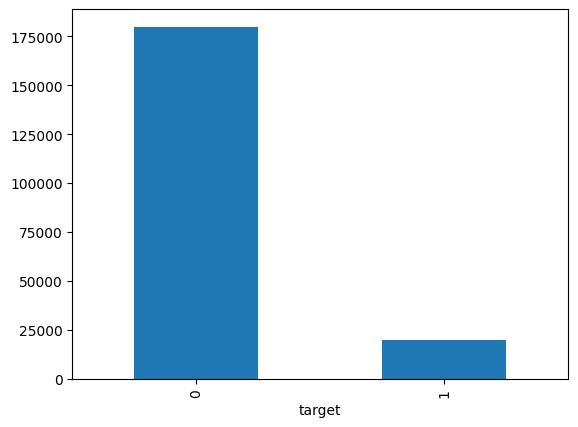

In [ ]:
data["target"].value_counts().plot(kind='bar')

In [ ]:
X.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,7.567236,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,1.235070,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,3.970500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,6.618800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,7.629600,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,8.584425,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,11.150600,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [ ]:
X.dtypes

var_0      float64
var_1      float64
var_2      float64
var_3      float64
var_4      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 200, dtype: object

In [ ]:
#correlation matrix for X, features that are most strongly correlated with each other
correl_with_X = X.corr()

correl_pairs = correl_with_X.unstack()
correl_pairs = correl_pairs[
    correl_pairs.index.get_level_values(0) != correl_pairs.index.get_level_values(1)
]

strongest_correl = correl_pairs.abs().sort_values(ascending=False)

top_10_strongest_correl = strongest_correl.head(10)

print("Top 10 Strongest Correlations Between Features in X:")
print(top_10_strongest_correl)

Top 10 Strongest Correlations Between Features in X:
var_26   var_139    0.009844
var_139  var_26     0.009844
var_148  var_53     0.009788
var_53   var_148    0.009788
var_165  var_81     0.009714
var_81   var_165    0.009714
         var_174    0.009490
var_174  var_81     0.009490
var_183  var_189    0.009359
var_189  var_183    0.009359
dtype: float64


In [ ]:
#correlation between X and y

y_series = pd.Series(y, index=X.index)

correlation_with_target = X.corrwith(y_series)

top_10_pos = correlation_with_target.nlargest(10)
top_10_neg = correlation_with_target.nsmallest(10)

print("\nTop 10 Features with Highest Positive Correlation with Y:")
print(top_10_pos)
print("\nTop 10 Features with Highest Negative Correlation with Y:")
print(top_10_neg)


Top 10 Features with Highest Positive Correlation with Y:
var_6      0.066731
var_110    0.064275
var_53     0.063399
var_26     0.062422
var_22     0.060558
var_99     0.058367
var_190    0.055973
var_2      0.055870
var_133    0.054548
var_0      0.052390
dtype: float64

Top 10 Features with Highest Negative Correlation with Y:
var_81    -0.080917
var_139   -0.074080
var_12    -0.069489
var_146   -0.063644
var_76    -0.061917
var_174   -0.061669
var_21    -0.058483
var_166   -0.057773
var_80    -0.057609
var_165   -0.055734
dtype: float64


# PCA

Before PCA: (200000, 200)
Number of components to retain 95.0% variance: 186
After PCA with 186 components: (200000, 186)


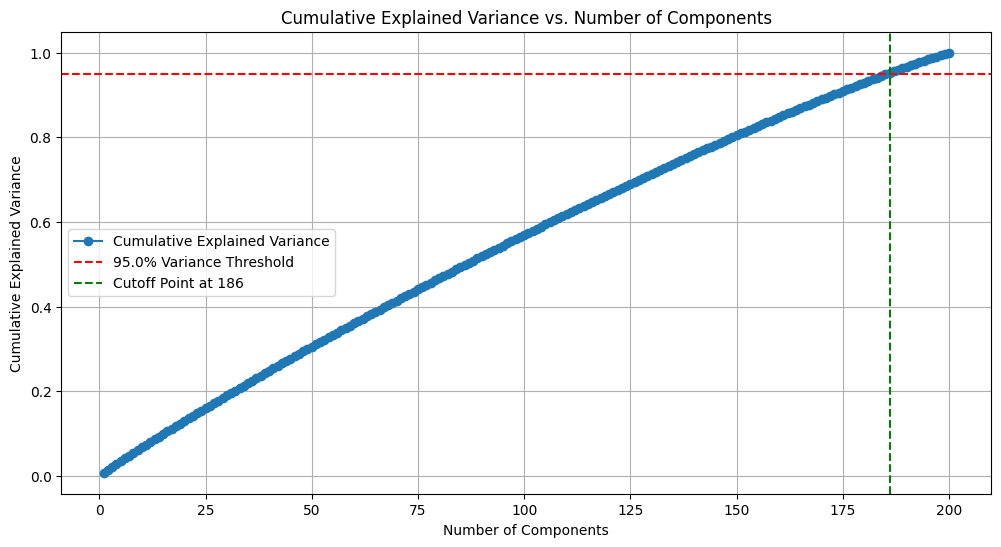

In [ ]:
print(f"Before PCA: {X.shape}")

variance_threshold = 0.95
pca = PCA()
X_pca = pca.fit_transform(X)


explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

cutoff_point = np.argmax(explained_variance_ratio >= variance_threshold) + 1

print(f"Number of components to retain {variance_threshold*100}% variance: {cutoff_point}")
print(f"After PCA with {cutoff_point} components: {X_pca[:, :cutoff_point].shape}")

components = range(1, len(explained_variance_ratio) + 1)
plt.figure(figsize=(12, 6))
plt.plot(components, explained_variance_ratio, marker='o', label='Cumulative Explained Variance')
plt.axhline(y=variance_threshold, color='r', linestyle='--', label=f'{variance_threshold*100}% Variance Threshold')
plt.axvline(x=cutoff_point, color='g', linestyle='--', label=f'Cutoff Point at {cutoff_point}')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.legend()
plt.show()


# normalize data

In [ ]:

scaler = preprocessing.MinMaxScaler()
# X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X = scaler.fit_transform(X)

## Undersample, Train Test Split, Oversample

Makeup of y before undersampling: Counter({np.int64(0): 179902, np.int64(1): 20098})


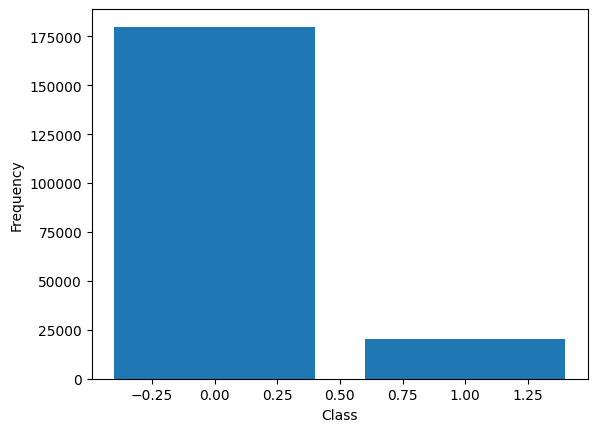

Makeup of y after undersampling: Counter({np.int64(0): 40000, np.int64(1): 20000})


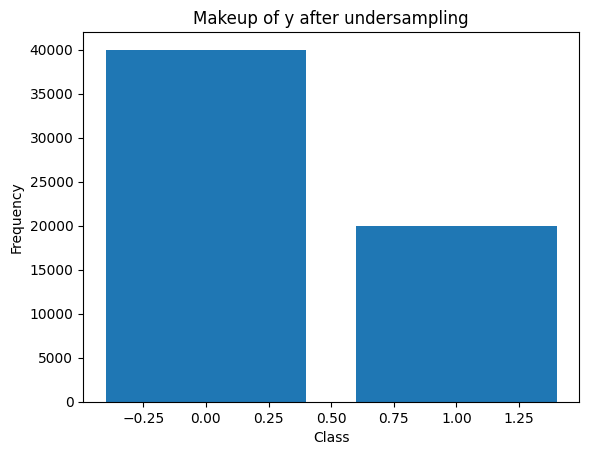

Makeup of y after oversampling: Counter({np.int64(1): 40000, np.int64(0): 40000})


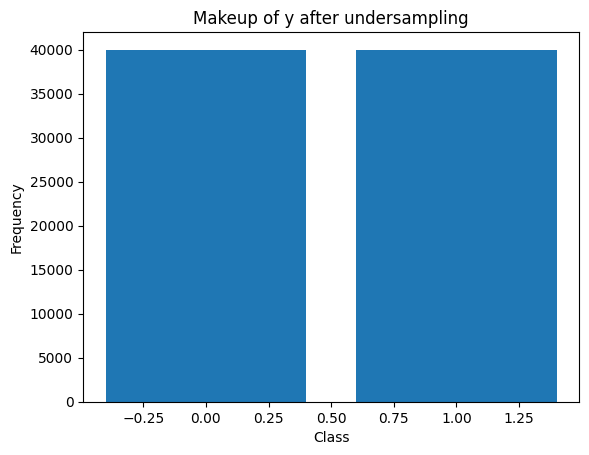

In [ ]:
# in the intial data see the 0s and 1 number. make it same amount of 0 and 1 for support
# Show the makeup of the labels
print("Makeup of y before undersampling:", Counter(y))
# Get the counts of each class in y_balanced 
counter = Counter(y) 
labels, values = zip(*counter.items()) 

plt.bar(labels, values) 
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

undersampler = RandomUnderSampler(sampling_strategy={0: 40000, 1: 20000}, random_state=42)
X_balanced, y_balanced = undersampler.fit_resample(X, y)

print("Makeup of y after undersampling:", Counter(y_balanced))

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

oversampler = RandomOverSampler(sampling_strategy={0: 40000, 1: 40000}, random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

counter = Counter(y_balanced) 
labels, values = zip(*counter.items()) 

plt.bar(labels, values) 
plt.title('Makeup of y after undersampling') 
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

print("Makeup of y after oversampling:", Counter(y_train_resampled))

counter = Counter(y_train_resampled) 
labels, values = zip(*counter.items()) 

plt.bar(labels, values) 
plt.title('Makeup of y after undersampling') 
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Models

## Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

start_time = time.time()

rf.fit(X_train_resampled, y_train_resampled)

y_pred = rf.predict(X_test)

end_time = time.time()
print(f"Training Time: {end_time - start_time:.2f} seconds")

print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Training Time: 117.10 seconds
Random Forest Classifier:
Accuracy: 0.7383

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.95      0.83      7977
           1       0.76      0.32      0.45      4023

    accuracy                           0.74     12000
   macro avg       0.75      0.63      0.64     12000
weighted avg       0.74      0.74      0.70     12000



## lgbm

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


lgbm = LGBMClassifier(n_estimators=100, random_state=42)

start_time = time.time()

lgbm.fit(X_train_resampled, y_train_resampled)

y_pred_lgbm = lgbm.predict(X_test)

end_time = time.time()
print(f"Training Time: {end_time - start_time:.2f} seconds")

print("\n LGBM Classifier:")
print(f" Accuracy: {accuracy_score(y_test, y_pred_lgbm):.4f}")
print("\n Classification Report:")
print(classification_report(y_test, y_pred_lgbm))

[LightGBM] [Info] Number of positive: 40000, number of negative: 40000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032902 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 51000
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training Time: 1.53 seconds

 LGBM Classifier:
 Accuracy: 0.7852

 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      7977
           1       0.65      0.76      0.70      4023

    accuracy                           0.79     12000
   macro avg       0.76      0.78      0.77     12000
weighted avg       0.80      0.79      0.79     12000



In [ ]:
#how significant each feature is for making predictions
lgbm.feature_importances_

array([29, 42, 37,  2,  1, 21, 51,  0,  4, 24,  0,  2, 42, 47,  0,  3,  0,
        0, 31,  0,  8, 36, 41, 10,  6,  1, 38,  0,  6,  0,  0,  9, 15, 37,
       39, 20, 21,  0,  0,  0, 32,  0,  0, 21, 34,  3,  0,  2, 12, 23,  0,
       15, 14, 52,  1,  4, 21,  3, 11,  0,  0,  0,  1,  1,  2,  0, 13, 33,
        1,  0, 15, 11,  1,  0,  4, 21, 43,  3, 31,  1, 31, 28,  8,  6,  0,
       11, 27, 24, 11, 26, 11, 26, 27, 15, 36, 23,  1,  3,  0, 39,  0,  0,
        7,  0,  7, 12, 19, 30, 34, 34, 44, 10, 11,  1, 10, 38,  6,  0, 25,
       23,  1, 35, 32, 28,  0, 17,  0, 21,  6,  0, 14, 14, 18, 38,  1, 16,
        0, 13,  2, 42,  4, 13,  2,  3, 11, 18, 52, 26, 34, 27, 14,  7,  1,
        0, 28, 21,  4, 21,  0,  0,  0,  0, 18, 16, 28, 51, 40, 17,  0, 40,
       40,  1, 22, 27, 45, 10,  0, 22,  4, 26, 15,  2,  0,  0, 25,  0, 11,
        0, 23,  0, 42, 30, 28,  4,  4, 25,  6, 29, 40,  9], dtype=int32)

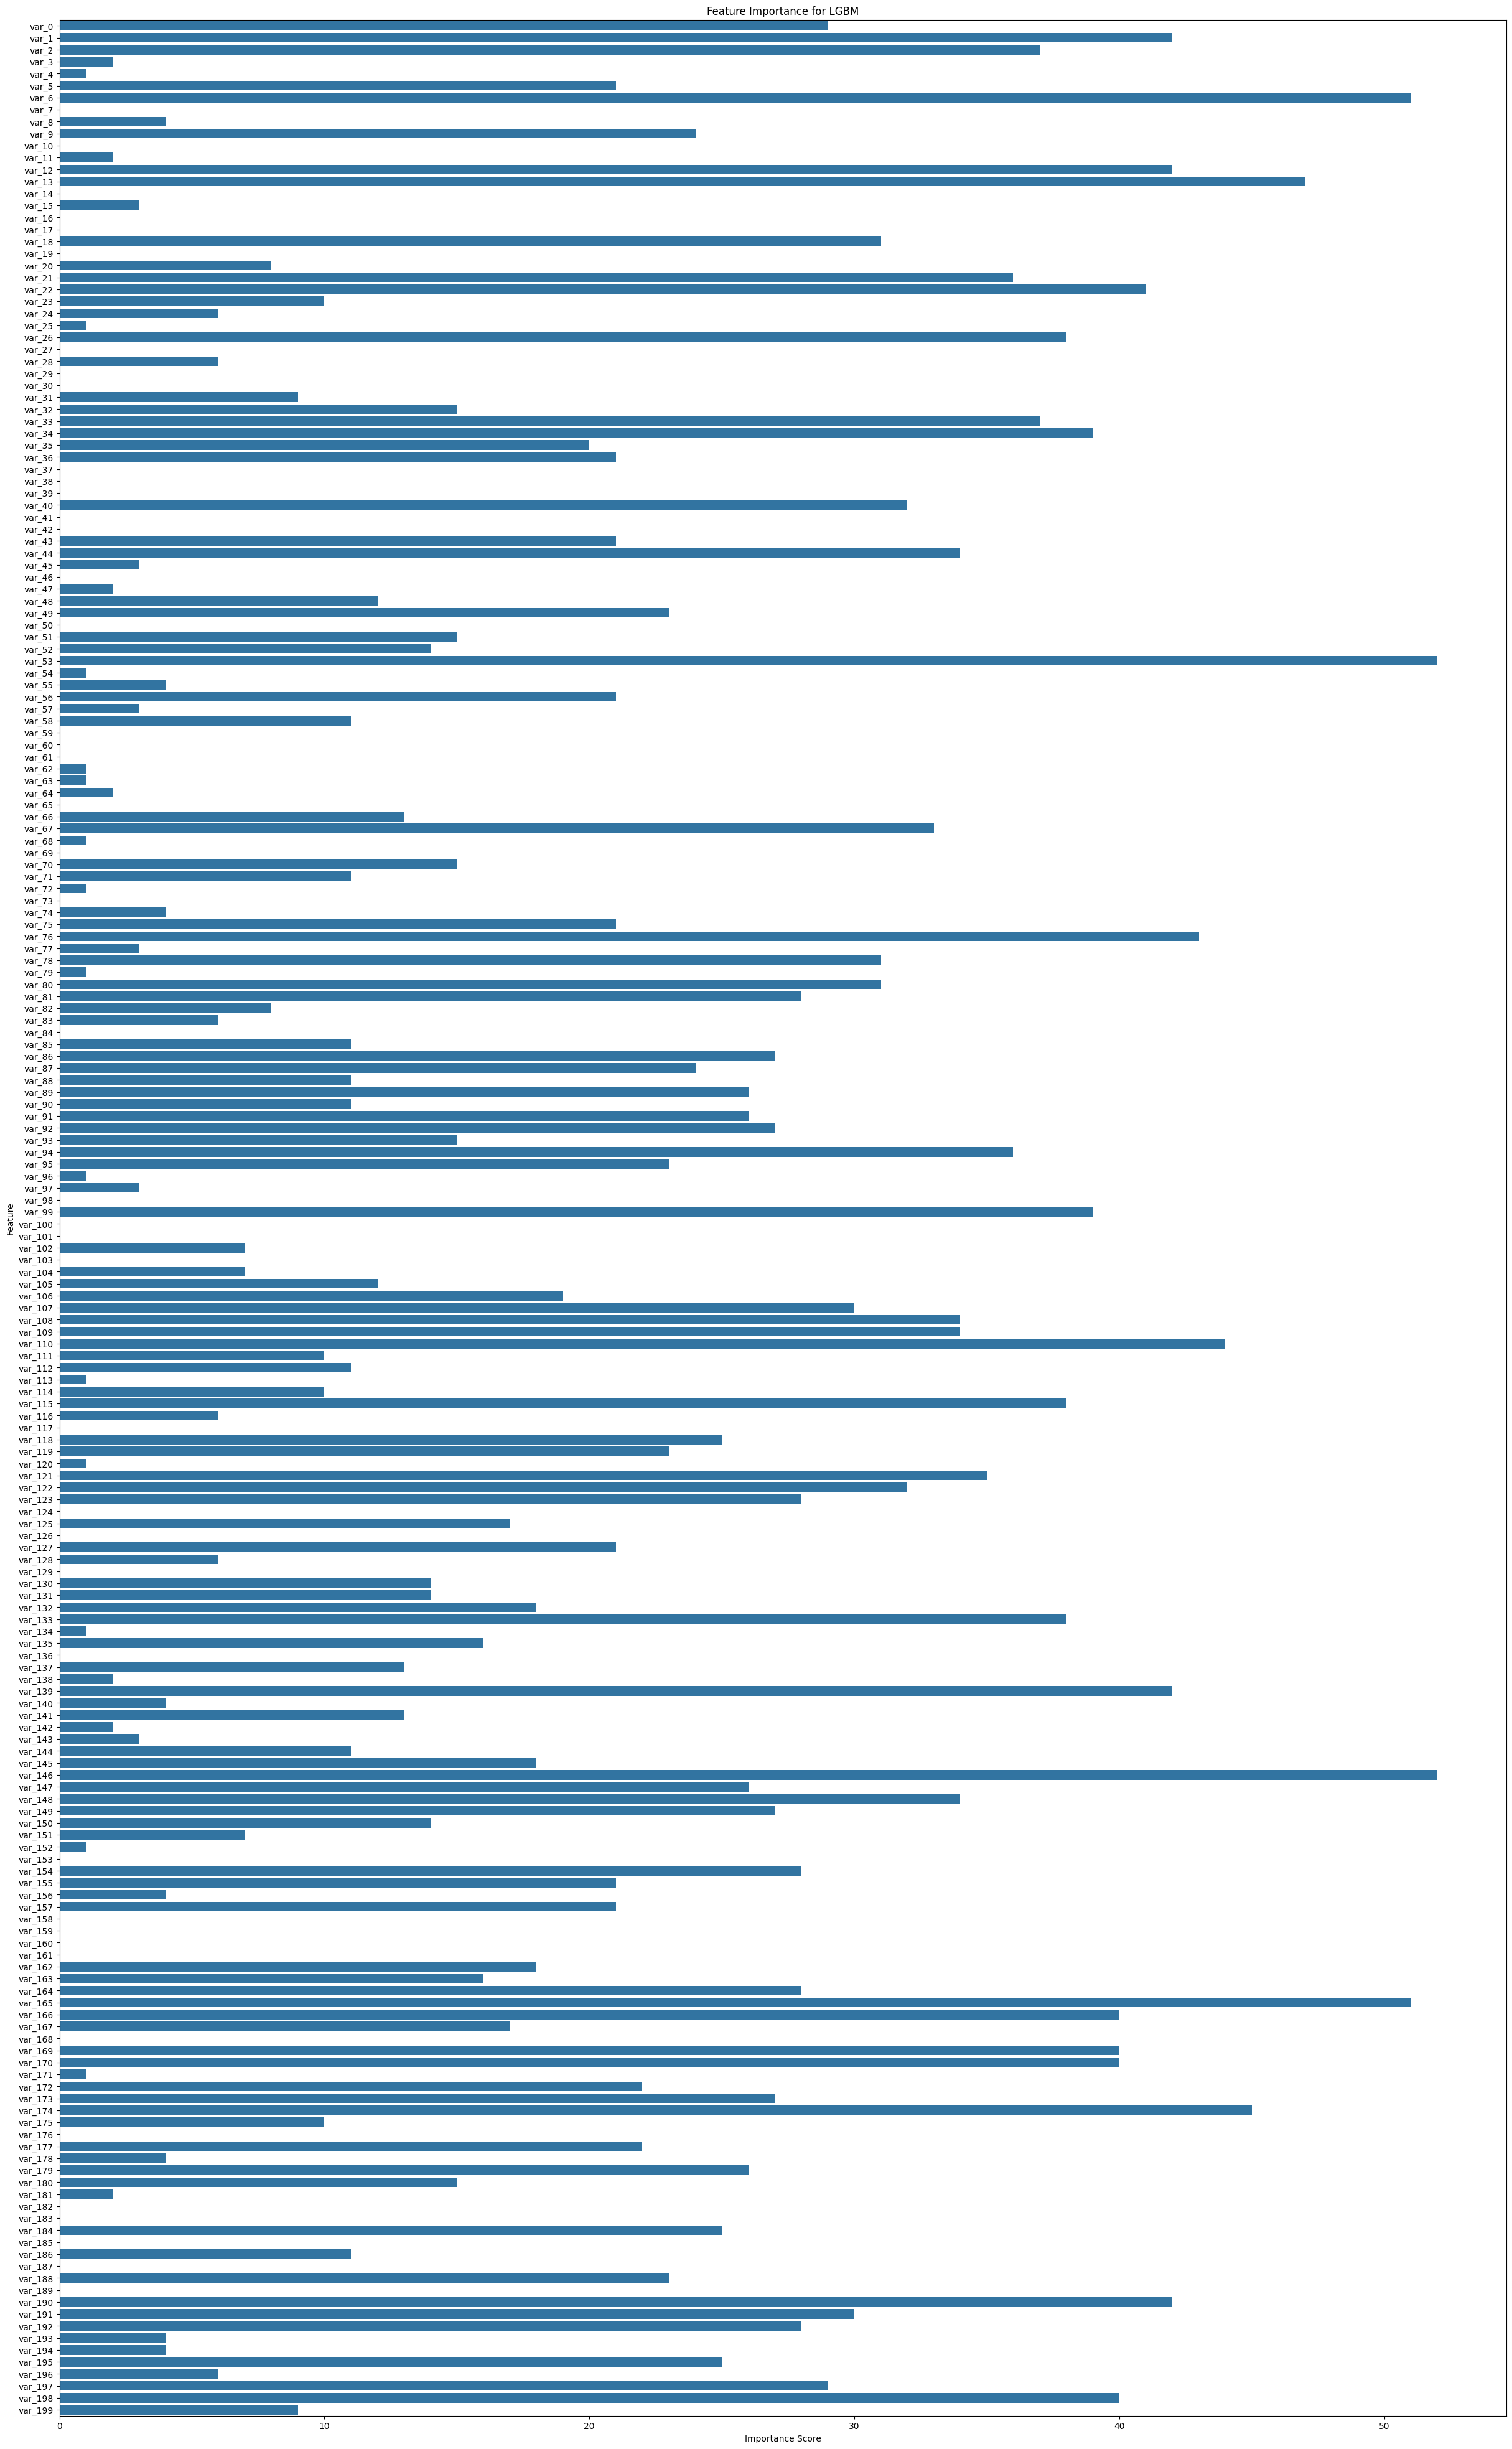

In [ ]:
#sort features in descending order to get the most important features at the top
feat_importances = pd.Series(lgbm.feature_importances_, index=feat_col)
plt.figure(figsize=(30, 50))
sns.barplot(x=feat_importances.values, y=feat_importances.index)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance for LGBM')

plt.show()

In [ ]:
#confusion matrix for lgbm
conf_matrix = confusion_matrix(y_test, y_pred_lgbm)
conf_matrix

array([[6346, 1631],
       [ 947, 3076]])

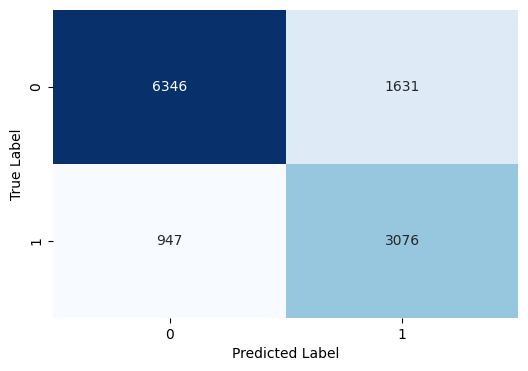

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## XGboost

In [ ]:
#XGboost

xgb= XGBClassifier(n_estimators=100, 
                   random_state=42, 
                   eval_metric='logloss')

start_time = time.time()

xgb.fit(X_train_resampled, y_train_resampled) 


y_pred_xgb = xgb.predict(X_test)

end_time = time.time()
print(f"Training Time: {end_time - start_time:.2f} seconds")

print("\n XGBoost Classifier:")
print(f" Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print("\n Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Training Time: 2.60 seconds

 XGBoost Classifier:
 Accuracy: 0.7913

 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      7977
           1       0.69      0.69      0.69      4023

    accuracy                           0.79     12000
   macro avg       0.77      0.77      0.77     12000
weighted avg       0.79      0.79      0.79     12000



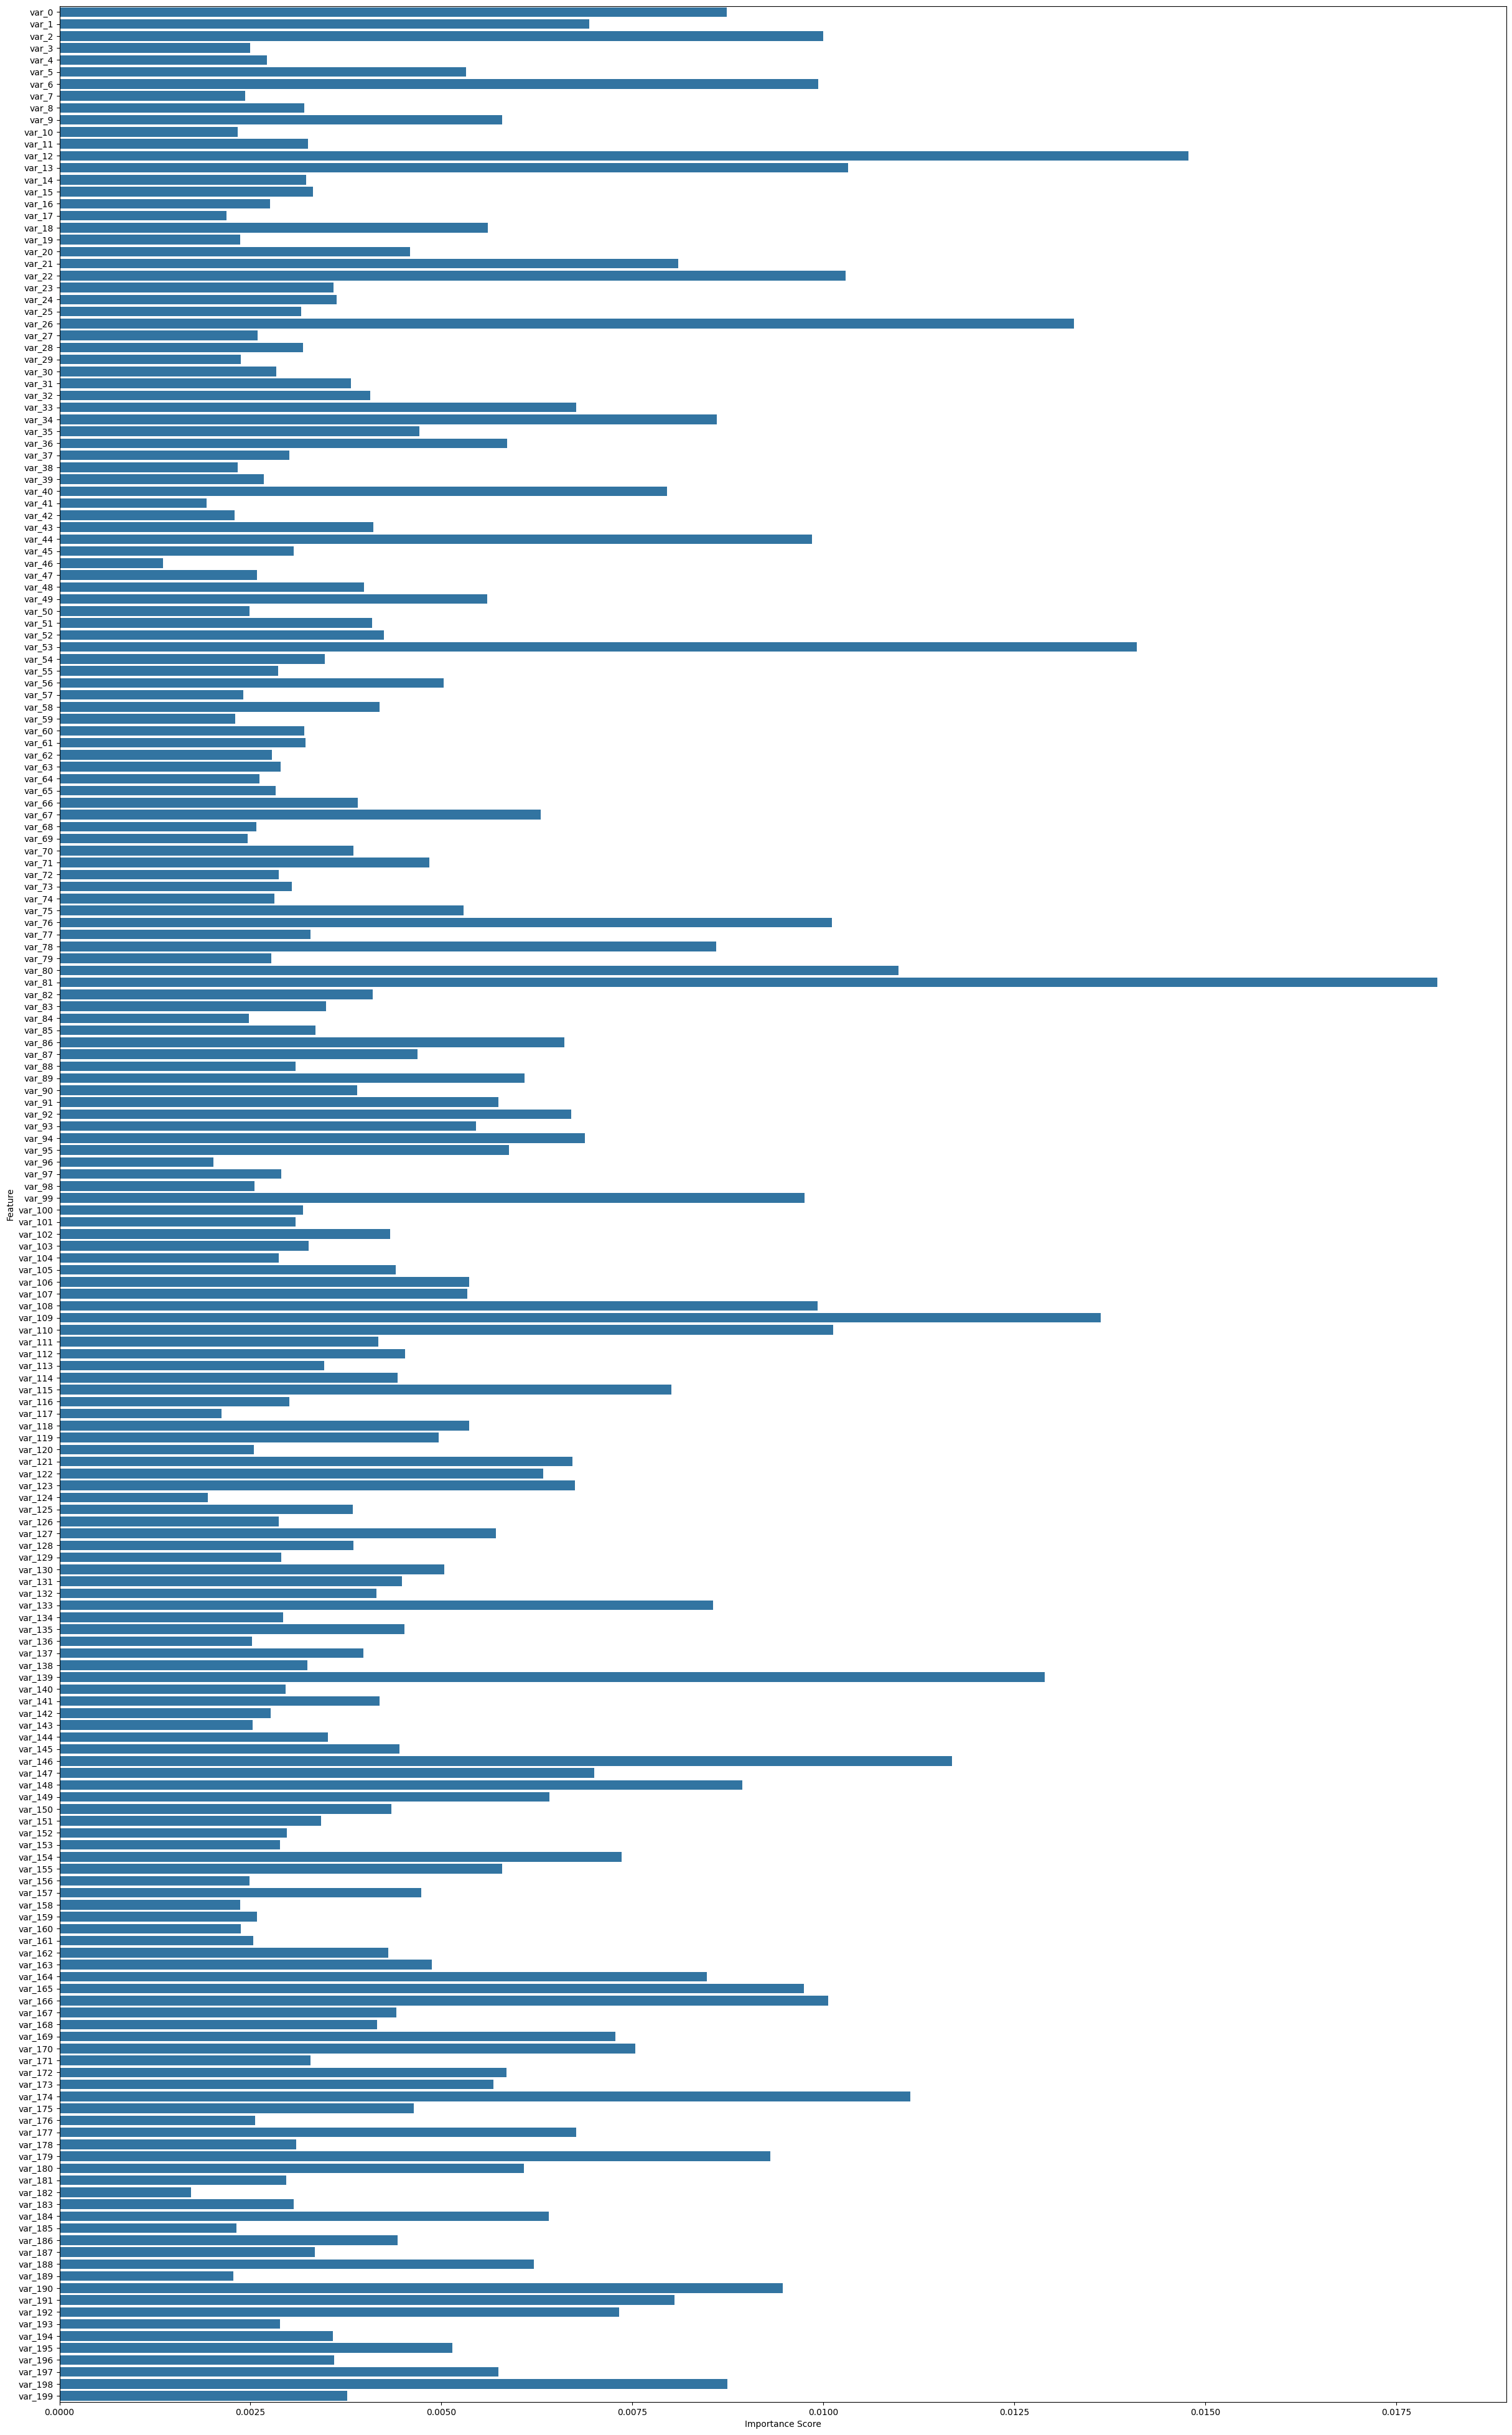

In [ ]:
#feature Importances
feat_importances = pd.Series(xgb.feature_importances_, index=feat_col)
plt.figure(figsize=(30, 50))
sns.barplot(x=feat_importances.values, y=feat_importances.index)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
conf_matrix

array([[6730, 1247],
       [1257, 2766]])

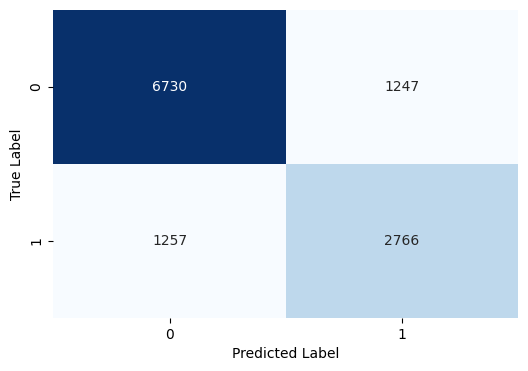

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# KNN

## find best k

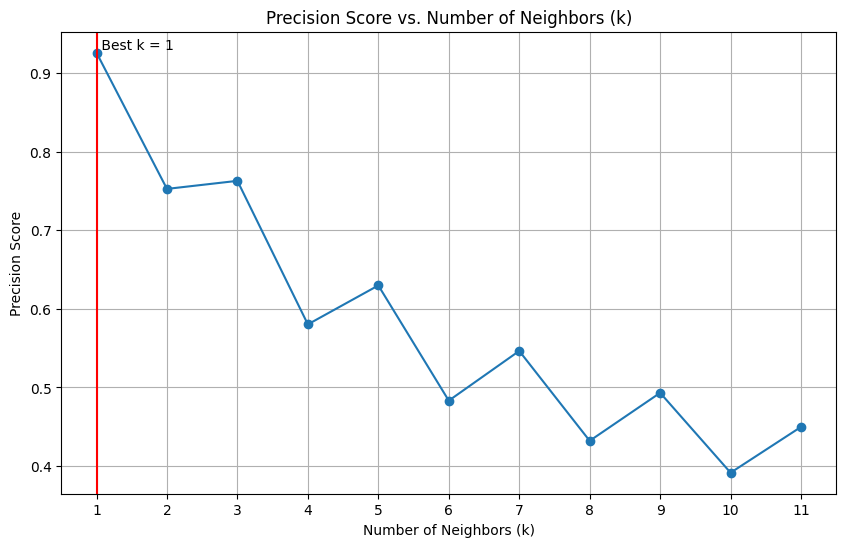

Best k: 1
Best f1 Score: 0.9257


In [ ]:
param_grid = {'n_neighbors': range(1, 12)}  # Testing k from 1 to 20

grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid,
                           scoring='f1', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)
best_k = grid_search.best_params_['n_neighbors']

# Get all precision scores for plotting
results = grid_search.cv_results_
k_values = param_grid['n_neighbors']
precision_scores = results['mean_test_score']

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, precision_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Precision Score')
plt.title('Precision Score vs. Number of Neighbors (k)')
plt.xticks(k_values)
plt.grid(True)
plt.axvline(x=best_k, color='r')
plt.text(best_k, grid_search.best_score_, f' Best k = {best_k}', horizontalalignment='left', verticalalignment='bottom')
plt.show()

print(f"Best k: {best_k}")
print(f"Best f1 Score: {grid_search.best_score_:.4f}")



## use best k with KNN, find performance metrics

In [ ]:
knn = KNeighborsClassifier(n_neighbors=best_k)

kfold = KFold(n_splits=5, shuffle=True, random_state=2)
precision_scores = []
recall_scores = []
f1_scores = []

for train_idx, test_idx in kfold.split(X_train_resampled, y_train_resampled):
    X_train, X_test = X_train_resampled[train_idx], X_train_resampled[test_idx]
    y_train, y_test = y_train_resampled[train_idx], y_train_resampled[test_idx]
    
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)
    
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

print(f"Precision: {np.mean(precision_scores):.4f}")
print(f"Recall: {np.mean(recall_scores):.4f}")
print(f"F1 Score: {np.mean(f1_scores):.4f}")

Precision: 0.9189
Recall: 0.8728
F1 Score: 0.8953


# MLP

In [ ]:
# Parameter space for hyperparameter tuning
parameter_space = {
    'hidden_layer_sizes': [(10, 30, 10), (20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

grid_search = GridSearchCV(
    estimator=MLPClassifier(max_iter=1000),
    param_grid=parameter_space,
    scoring={
    'precision': make_scorer(precision_score, zero_division=1),
    'recall': make_scorer(recall_score, zero_division=1),
    'f1': make_scorer(f1_score, zero_division=1)
},
    refit='f1',  # Optimize for F1 score
    cv=5,        # 5-fold cross-validation
    verbose=2,   # Display progress
    n_jobs=-1    # Use all available processors
)

grid_search.fit(X_train_resampled, y_train_resampled)

y_pred_test = grid_search.best_estimator_.predict(X_test)
precision = precision_score(y_test, y_pred_test, zero_division=1)
recall = recall_score(y_test, y_pred_test, zero_division=1)
f1 = f1_score(y_test, y_pred_test, zero_division=1)

print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)
print("\nTest Set Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}
Best F1 Score: 0.7997908477914066

Test Set Metrics:
Precision: 0.8382
Recall: 0.8261
F1 Score: 0.8321


## Decision Tree

In [ ]:
criterions = ["gini", "entropy", "log_loss"]
for criterion in criterions:
    decision_tree_clf = sklearn.tree.DecisionTreeClassifier(criterion=criterion, random_state=2) 
    kfold = KFold(n_splits=5, shuffle=True, random_state=2)
    precision_scores = []
    recall_scores = []
    f1_scores = []

    decision_tree_clf.fit(X_train, y_train)

    y_pred = decision_tree_clf.predict(X_test)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    print(f"Criterion: {criterion}")
    print(f"Precision: {np.mean(precision_scores):.4f}")
    print(f"Recall: {np.mean(recall_scores):.4f}")
    print(f"F1 Score: {np.mean(f1_scores):.4f}")

Criterion: gini
Precision: 0.8171
Recall: 0.9154
F1 Score: 0.8634
Criterion: entropy
Precision: 0.8118
Recall: 0.9102
F1 Score: 0.8582
Criterion: log_loss
Precision: 0.8118
Recall: 0.9102
F1 Score: 0.8582


## Logistic Regression

In [ ]:
penalty_options = ["l1", "l2", "elasticnet", None]

solver_options = {
    "lbfgs": ["l2", None],
    "newton-cholesky": ["l2", None],
    "sag": ["l2", None],
    "saga": ["elasticnet", "l1", "l2", None]
}

for solver_option, penalties in solver_options.items():
    for penalty_option in penalties:
        if penalty_option == "elasticnet":
            logistic_regression = LogisticRegression(
                penalty=penalty_option, solver=solver_option, random_state=2, l1_ratio=0.5
            )
        else:
            logistic_regression = LogisticRegression(
                penalty=penalty_option, solver=solver_option, random_state=2
            )
        
        kfold = KFold(n_splits=5, shuffle=True, random_state=2)
        precision_scores = []
        recall_scores = []
        f1_scores = []
        
        for train_idx, test_idx in kfold.split(X_train_resampled, y_train_resampled):
            X_train, X_test = X_train_resampled[train_idx], X_train_resampled[test_idx]
            y_train, y_test = y_train_resampled[train_idx], y_train_resampled[test_idx]
            logistic_regression.fit(X_train, y_train)
            
            y_pred = logistic_regression.predict(X_test)
            
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            
            precision_scores.append(precision)
            recall_scores.append(recall)
            f1_scores.append(f1)
        
        print(f"Solver Option: {solver_option}, Penalty Option: {penalty_option}")
        print(f"Precision: {np.mean(precision_scores):.4f}")
        print(f"Recall: {np.mean(recall_scores):.4f}")
        print(f"F1 Score: {np.mean(f1_scores):.4f}")


Solver Option: lbfgs, Penalty Option: l2
Precision: 0.7823
Recall: 0.7786
F1 Score: 0.7804
Solver Option: lbfgs, Penalty Option: None
Precision: 0.7822
Recall: 0.7788
F1 Score: 0.7805
Solver Option: newton-cholesky, Penalty Option: l2
Precision: 0.7823
Recall: 0.7788
F1 Score: 0.7806
Solver Option: newton-cholesky, Penalty Option: None
Precision: 0.7823
Recall: 0.7788
F1 Score: 0.7806
Solver Option: sag, Penalty Option: l2
Precision: 0.7823
Recall: 0.7788
F1 Score: 0.7805
Solver Option: sag, Penalty Option: None
Precision: 0.7824
Recall: 0.7788
F1 Score: 0.7806
Solver Option: saga, Penalty Option: elasticnet
Precision: 0.7823
Recall: 0.7790
F1 Score: 0.7806
Solver Option: saga, Penalty Option: l1
Precision: 0.7823
Recall: 0.7789
F1 Score: 0.7806
Solver Option: saga, Penalty Option: l2
Precision: 0.7823
Recall: 0.7788
F1 Score: 0.7805
Solver Option: saga, Penalty Option: None
Precision: 0.7823
Recall: 0.7788
F1 Score: 0.7806


## Gradient Boosting Classifier

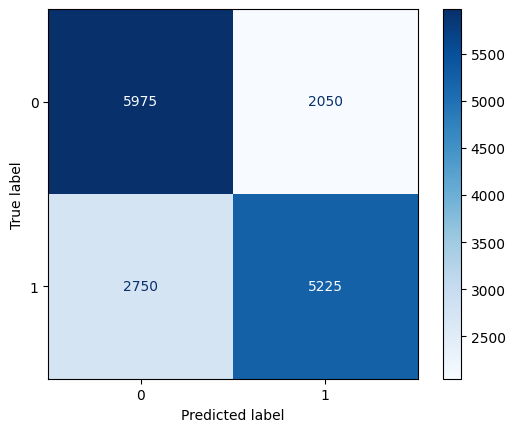

Precision: 0.7182
Recall: 0.6552
F1 Score: 0.6852


In [ ]:
gradient_boosting_clf = GradientBoostingClassifier(n_estimators=20, random_state=2)
#(X_train, X_test, y_train, y_test) = model_selection.train_test_split(X, y, test_size=1/3)

gradient_boosting_clf.fit(X_train_resampled, y_train_resampled)

y_pred = gradient_boosting_clf.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)

plt.show()

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

## LogisticRegression

In [ ]:
penalty_options = ["l1", "l2", "elasticnet", None]

solver_options = {"lbfgs": ["l2", None], "newton-cholesky": ["l2", None],
                    "sag": ["l2", None], "saga": ["elasticnet", "l1", "l2", None]}
for solver_option, penalty_options in solver_options.items():
    for penalty_option in penalty_options:
        if penalty_option == "elasticnet":
            logistic_regression = LogisticRegression(penalty=penalty_option, solver=solver_option, random_state=2, l1_ratio=0.5)
        else:
            logistic_regression = LogisticRegression(penalty=penalty_option, solver=solver_option, random_state=2)
        kfold = KFold(n_splits=5, shuffle=True, random_state=2)
        precision_scores = []
        recall_scores = []
        f1_scores = []
    
        for train_idx, test_idx in kfold.split(X_train_resampled, y_train_resampled):
            X_train, X_test = X_train_resampled[train_idx], X_train_resampled[test_idx]
            y_train, y_test = y_train_resampled[train_idx], y_train_resampled[test_idx]
            logistic_regression.fit(X_train, y_train)
        
            y_pred = logistic_regression.predict(X_test)
        
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
        
            precision_scores.append(precision)
            recall_scores.append(recall)
            f1_scores.append(f1)
    
        print("Solver Option: " + solver_option + ", Penalty Option: " + str(penalty_option))
        print(f"Precision: {np.mean(precision_scores):.4f}")
        print(f"Recall: {np.mean(recall_scores):.4f}")
        print(f"F1 Score: {np.mean(f1_scores):.4f}")

Solver Option: lbfgs, Penalty Option: l2
Precision: 0.7823
Recall: 0.7786
F1 Score: 0.7804
Solver Option: lbfgs, Penalty Option: None
Precision: 0.7822
Recall: 0.7788
F1 Score: 0.7805
Solver Option: newton-cholesky, Penalty Option: l2
Precision: 0.7823
Recall: 0.7788
F1 Score: 0.7806
Solver Option: newton-cholesky, Penalty Option: None
Precision: 0.7823
Recall: 0.7788
F1 Score: 0.7806
Solver Option: sag, Penalty Option: l2
Precision: 0.7823
Recall: 0.7788
F1 Score: 0.7805
Solver Option: sag, Penalty Option: None
Precision: 0.7824
Recall: 0.7788
F1 Score: 0.7806
Solver Option: saga, Penalty Option: elasticnet
Precision: 0.7823
Recall: 0.7790
F1 Score: 0.7806
Solver Option: saga, Penalty Option: l1
Precision: 0.7823
Recall: 0.7789
F1 Score: 0.7806
Solver Option: saga, Penalty Option: l2
Precision: 0.7823
Recall: 0.7788
F1 Score: 0.7805
Solver Option: saga, Penalty Option: None
Precision: 0.7823
Recall: 0.7788
F1 Score: 0.7806
